In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#https://www.kaggle.com/nidakapmaz/unidentified-flying-object

In [2]:
df = pd.read_csv("scrubbed.csv",encoding='cp1252')

C:\Users\Joseph Forest\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(2)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082


In [4]:
# comments column contains unmeaningfull words. 
# cleaning character caused unmeaningful words
# Different encoding types were tried. Result negative


In [5]:
df.comments = df.comments.str.replace("&#44","").str.replace("&amp","")

In [6]:
df.comments

0        This event took place in early fall around 194...
1        1949 Lackland AFB TX.  Lights racing across th...
2          Green/Orange circular disc over Chester England
3        My older brother and twin sister were leaving ...
4        AS a Marine 1st Lt. flying an FJ4B fighter/att...
                               ...                        
80327    Round from the distance/slowly changing colors...
80328    Boise ID spherical 20 min 10 red lights seen b...
80329                                             Napa UFO
80330    Saw a five gold lit cicular craft moving fastl...
80331    2 witnesses 2  miles apart Red ; White Elongat...
Name: comments, Length: 80332, dtype: object

In [7]:
df.shape

(80332, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [9]:
df.isnull().sum()
# number of Null 

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [10]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_percent = round(missing_percent,2)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [11]:
missing(df)

,Missing_Number,Missing_Percent
country,9670,12.04
state,5797,7.22
shape,1932,2.41
comments,15,0.02
datetime,0,0.00
city,0,0.00
duration (seconds),0,0.00
duration (hours/min),0,0.00
date posted,0,0.00
latitude,0,0.00


In [12]:
df.datetime.sample(5)

64470    8/11/1992 02:40
70274    8/28/2009 22:00
52908    6/30/1996 00:00
40021     4/3/2005 22:29
35744    4/10/2010 21:45
Name: datetime, dtype: object

In [13]:
# df.datetime = pd.to_datetime(df.datetime)
# the code written above give error because of time format.
# time format can not be 24:00 so time need to be edited

In [14]:
df.datetime = df.datetime.map(lambda x: "00:00" if "24:00" in x else x )
# time format replaced from 24:00 to 00:00

In [15]:
df.datetime = pd.to_datetime(df.datetime)

In [16]:
df.datetime.dtype

dtype('<M8[ns]')

In [17]:
# split date and time

In [18]:
df["date"] = df.datetime.dt.date

In [19]:
df["time"] = df.datetime.dt.time

In [20]:
df[["date","time"]]

,date,time
0,1949-10-10,20:30:00
1,1949-10-10,21:00:00
2,1955-10-10,17:00:00
3,1956-10-10,21:00:00
4,1960-10-10,20:00:00
...,...,...
80327,2013-09-09,21:15:00
80328,2013-09-09,22:00:00
80329,2013-09-09,22:00:00
80330,2013-09-09,22:20:00


In [21]:
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB TX. Lights racing across th...,12/16/2005,29.38421,-98.581082,1949-10-10,21:00:00
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester England,1/21/2008,53.2,-2.916667,1955-10-10,17:00:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,2013-09-09,21:15:00
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise ID spherical 20 min 10 red lights seen b...,9/30/2013,43.613611,-116.202500,2013-09-09,22:00:00
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO,9/30/2013,38.297222,-122.284444,2013-09-09,22:00:00
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013-09-09,22:20:00


In [22]:
df.datetime.dt.year.value_counts()
# UFO sightings by year 


2012    7308
2013    6992
2011    5077
2008    4777
2009    4508
        ... 
1920       1
1906       1
1933       1
1925       1
1934       1
Name: datetime, Length: 88, dtype: int64

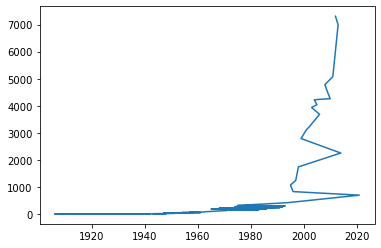

In [30]:
df.datetime.dt.year.value_counts().plot(kind = "line");




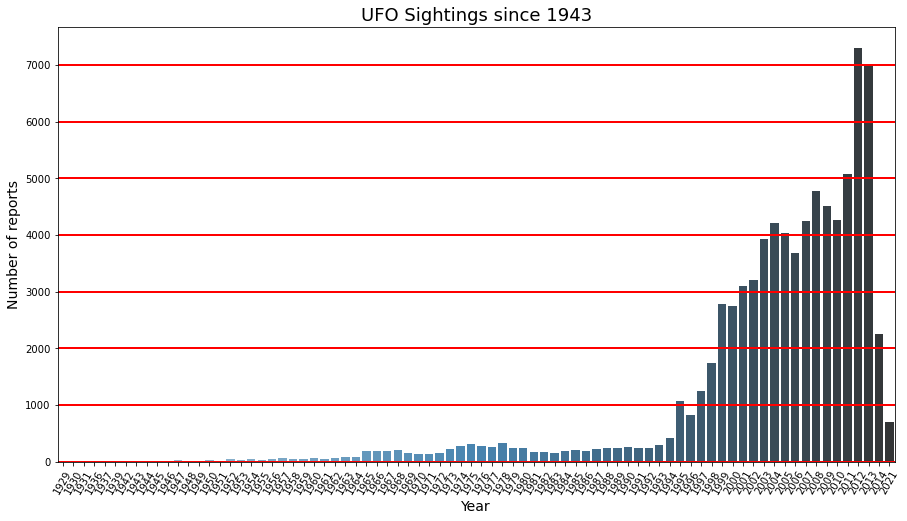

In [35]:

years_data = df.datetime.dt.year.value_counts()
years_index = years_data.index  
years_values = years_data.values
plt.figure(figsize=(15,8))
plt.grid(color='r', linestyle='-', linewidth=2)
plt.xticks(rotation = 60)
plt.title('UFO Sightings since 1943', fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=years_index[:80],y=years_values[:80], palette = "Blues_d")



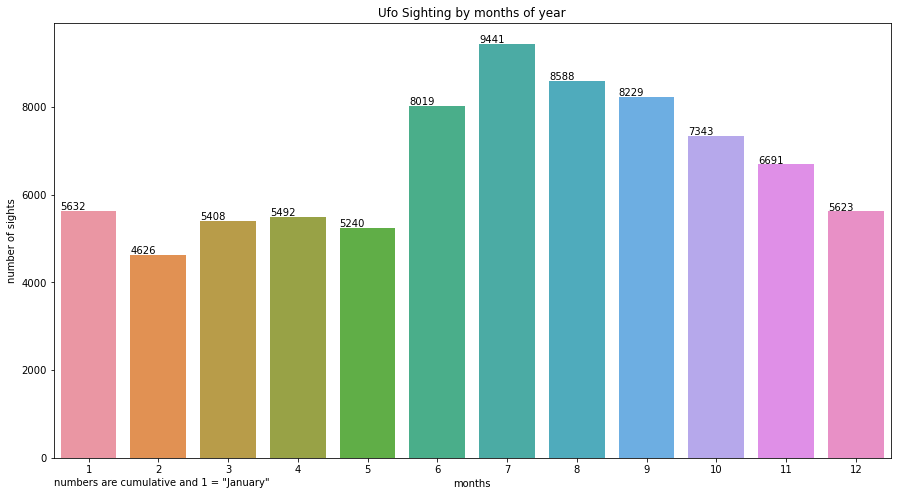

In [43]:


plt.figure(figsize=(15,8))
plt.title("Ufo Sighting by months of year")
ax = sns.countplot(df.datetime.dt.month)
ax.set(xlabel='months', ylabel='number of sights')

plt.annotate('numbers are cumulative and 1 = "January"', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));

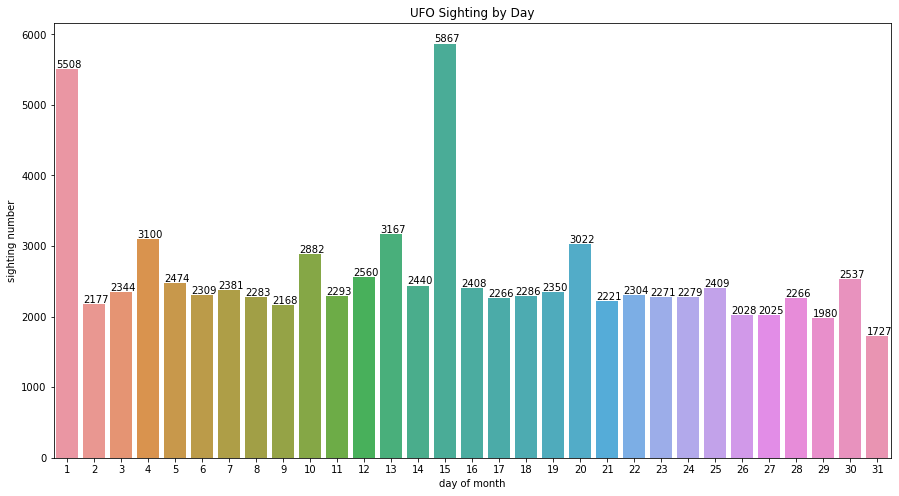

In [49]:
plt.figure(figsize=(15,8))

ax = sns.countplot(df.datetime.dt.day)
plt.title("UFO Sighting by Day")
ax.set(xlabel = "day of month", ylabel = "sighting number")
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));
